In [1]:
#!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

# Şirket sembollerini bir listeye ekleyelim
companies = ["AAPL", "MSFT", "AMZN", "GOOGL", "NVDA"]

# 20 yıl öncesinden bugüne kadar günlük veri çekme
start_date = "2004-01-01"  # 20 yıl öncesinden başlayarak
end_date = "2024-01-01"    # Bugün tarihine kadar

# Her şirket için veri çekme
data = {}
for company in companies:
    data[company] = yf.download(company, start=start_date, end=end_date, interval="1d")
    data[company]["Company"] = company  # Şirket adı kolonunu ekleyelim

# Tüm veriyi tek bir DataFrame'e birleştirme
combined_data = pd.concat(data.values(), ignore_index=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
#combined_data.to_csv('http://localhost:8889/tree/Desktop/Thesis/combined_data.csv', index=True)

In [4]:
combined_data.to_csv('combined_data.csv', index=True)

In [5]:
combined_data.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2004-01-02,0.384821,0.388393,0.378214,0.380000,0.320548,144642400,AAPL
2004-01-05,0.382500,0.399821,0.382500,0.395893,0.333955,395018400,AAPL
2004-01-06,0.397321,0.400357,0.387679,0.394464,0.332749,509348000,AAPL
2004-01-07,0.394643,0.407679,0.391607,0.403393,0.340281,586874400,AAPL
2004-01-08,0.407857,0.423750,0.404464,0.417143,0.351880,460303200,AAPL


In [6]:
from sklearn.preprocessing import MinMaxScaler

# 1. Eksik Verileri Kontrol Etme
missing_values = combined_data.isnull().sum()

# Eğer eksik veri varsa, basitçe dolduralım (örneğin ileri doldurma yöntemi ile)
if missing_values.any():
    combined_data.fillna(method='ffill', inplace=True)  # Eksik değerleri önceki değerle doldur
    combined_data.fillna(method='bfill', inplace=True)  # İlk veri noktası eksikse, sonraki değerle doldur

# 2. Veriyi Normalizasyon (MinMaxScaler kullanarak [0,1] aralığına ölçekleme)
scaler = MinMaxScaler()
scaled_data = combined_data.copy()
scaled_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(
    combined_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
)

# İlk birkaç satırı tekrar kontrol edelim
scaled_data.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2004-01-02,0.000793,0.000792,0.000795,0.000788,0.000653,0.027003,AAPL
2004-01-05,0.000787,0.000822,0.000807,0.000829,0.000688,0.076275,AAPL
2004-01-06,0.000826,0.000824,0.000820,0.000826,0.000685,0.098774,AAPL
2004-01-07,0.000819,0.000843,0.000831,0.000849,0.000705,0.114031,AAPL
2004-01-08,0.000853,0.000884,0.000865,0.000885,0.000735,0.089122,AAPL


Veri Temizleme ve Ön İşleme Adımları
Eksik Verilerin Kontrolü ve Doldurulması

Eksik veri olup olmadığını kontrol etmek ve eksik değerleri doldurmak.
Uç Değerlerin (Outliers) Tespiti ve Ele Alınması

Veri kümesindeki uç değerleri tespit ederek analizleri bozabilecek anomalileri temizlemek.
Veri Normalizasyonu veya Ölçeklendirme

Farklı ölçeklerdeki özellikleri aynı düzeye getirmek, özellikle makine öğrenimi modellerinin daha iyi performans göstermesini sağlar.
Hadi bu adımları uygulayalım. Önce veri temizleme işlemlerine bakalım.
1. Eksik Verilerin Kontrolü
Önce veri setindeki eksik değerleri kontrol edelim ve ardından gerekirse doldurma işlemleri yapalım.

2. Veriyi Normalleştirme
Veriyi [0, 1] aralığına ölçeklendirerek görselleştirme ve modelleme için uygun hale getirelim.

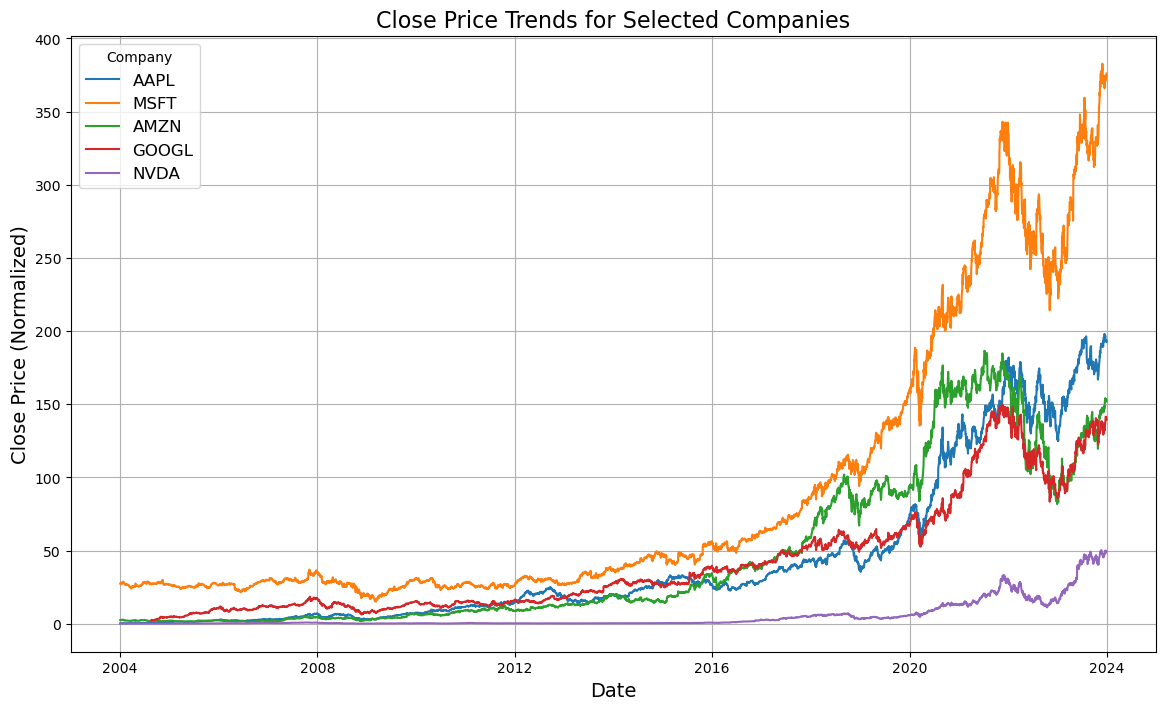

In [7]:
import matplotlib.pyplot as plt

# Şirketlere göre kapanış fiyatlarının zaman serisi grafiği
plt.figure(figsize=(14, 8))
for company in combined_data['Company'].unique():
    company_data = combined_data[combined_data['Company'] == company]
    plt.plot(company_data.index, company_data['Close'], label=company)

plt.title("Close Price Trends for Selected Companies", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (Normalized)", fontsize=14)
plt.legend(title="Company", fontsize=12)
plt.grid(True)
plt.show()

Analiz:
Farklı Şirket Performansları:

NVIDIA (NVDA), son yıllarda diğer şirketlerden daha hızlı bir büyüme trendi göstermiştir.
Microsoft (MSFT) ve Apple (AAPL) da uzun vadede güçlü bir artış sergilemiştir.
Volatilite Karşılaştırması:

Her şirket için farklı volatilite seviyeleri gözlemlenebilir. Örneğin, Amazon (AMZN) ve Google (GOOGL) gibi şirketler belirli dönemlerde daha stabil performans sergiliyor.
Trend Kıyaslaması:

Bu grafik, hangi şirketlerin belirli bir dönemde daha iyi performans gösterdiğini anlamaya yardımcı olur.

Yukarıdaki grafik, seçtiğiniz tüm şirketlerin (AAPL, MSFT, AMZN, GOOGL, NVDA) kapanış fiyatlarının zaman içerisindeki trendlerini göstermektedir.

Analiz:
Uzun Vadeli Trendler:

AAPL (Apple) ve MSFT (Microsoft) hisselerinde sürekli bir yükseliş gözlemleniyor.
NVIDIA (NVDA) son yıllarda dikkat çekici bir yükseliş trendi sergiliyor, bu muhtemelen yapay zeka ve GPU pazarındaki etkisiyle ilgili.
Volatilite:

Belirli dönemlerde şirketlerin kapanış fiyatlarındaki dalgalanmalar daha yoğun. Örneğin, 2020 civarında çoğu şirketin hisselerinde büyük dalgalanmalar yaşanmış.
Karşılaştırmalı Performans:

Şirketler arasındaki performans farklılıkları uzun vadeli yatırım kararlarını anlamaya yardımcı olabilir.

1. Eksik Veri Kontrolü ve Doldurma
Veri kümesindeki eksik değerler kontrol edildi.
Eksik değerler, ileri (ffill) ve geri doldurma (bfill) yöntemleri ile tamamlandı.
2. Veri Normalizasyonu
Tüm sayısal sütunlar (Open, High, Low, Close, Adj Close, Volume) [0, 1] aralığına ölçeklendirildi.
Bu işlem, özellikle farklı büyüklükteki verilerin modellerde eşit katkı sağlamasını ve grafiklerde daha düzenli bir görünüm elde edilmesini sağlar.

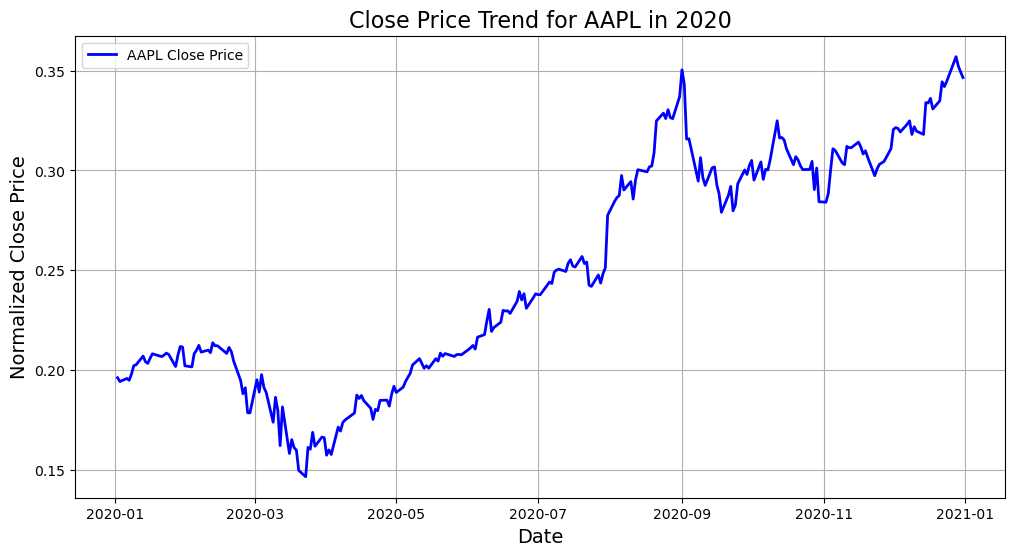

In [8]:
# Belirli bir şirketin belirli bir dönemini analiz edelim. Örneğin, Apple Inc. (AAPL) için 2020 yılına odaklanalım.
company_to_analyze = "AAPL"
start_date = "2020-01-01"
end_date = "2020-12-31"

# Belirtilen şirket ve tarih aralığına göre veri filtreleme
filtered_data = scaled_data[(scaled_data['Company'] == company_to_analyze) & 
                            (scaled_data.index >= start_date) & 
                            (scaled_data.index <= end_date)]

# Seçilen dönemdeki kapanış fiyatlarını görselleştirelim
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label=f"{company_to_analyze} Close Price", linewidth=2, color='blue')
plt.title(f"Close Price Trend for {company_to_analyze} in 2020", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Close Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Yukarıdaki grafik, Apple Inc. (AAPL) için 2020 yılı boyunca kapanış fiyatlarının normalize edilmiş trendini göstermektedir. Bu grafik, seçilen dönem içerisindeki fiyat değişikliklerini detaylı bir şekilde analiz etmenizi sağlar.

Analiz:
Başlangıç: 2020'nin başında fiyatlar düşük bir seviyede başlıyor ve Mart 2020'de bir düşüş gözlemleniyor.
Mart Düşüşü: Pandemi nedeniyle birçok piyasanın etkilendiği dönemi gösteriyor.
Yükseliş Dönemi: 2020 yazından itibaren sürekli bir toparlanma ve yükseliş trendi var.
Volatilite: Özellikle yıl sonuna doğru dalgalanmalar arttı.
Bir Sonraki Adımlar:
Hareketli Ortalama ekleyerek trendin daha yumuşak bir versiyonunu görebiliriz.
Diğer Şirketler ve Dönemler: İlgili diğer şirketler için de benzer analizler yapılabilir.

C:\Users\Tuna\AppData\Local\Temp\ipykernel_22328\2998106574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['20-Day MA'] = filtered_data['Close'].rolling(window=20).mean()


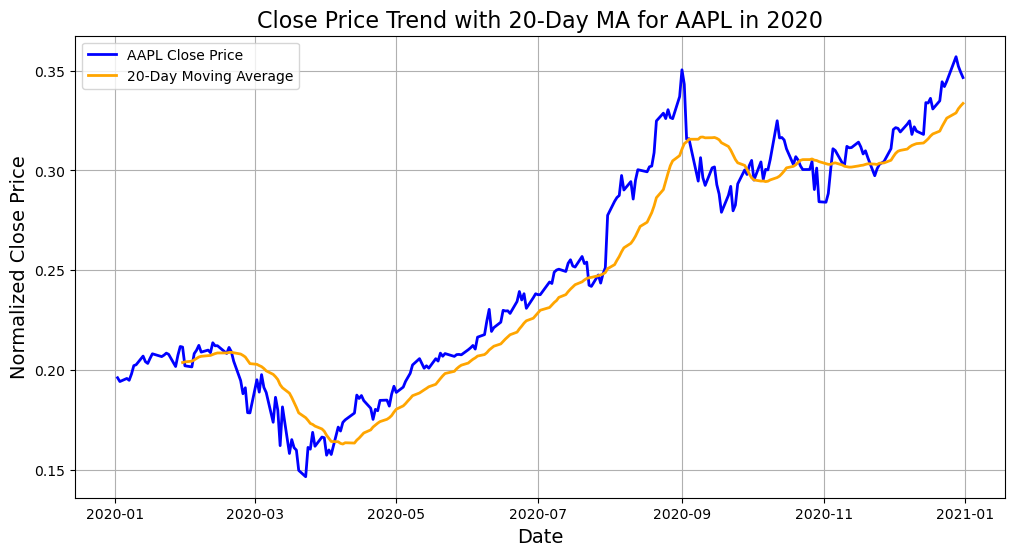

In [9]:
# Hareketli ortalama hesaplayarak daha yumuşak bir trend ekleyelim.
# Örneğin, 20 günlük basit hareketli ortalamayı hesaplayalım.
filtered_data['20-Day MA'] = filtered_data['Close'].rolling(window=20).mean()

# Hareketli ortalama ile birlikte görselleştirelim
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label=f"{company_to_analyze} Close Price", linewidth=2, color='blue')
plt.plot(filtered_data.index, filtered_data['20-Day MA'], label="20-Day Moving Average", linewidth=2, color='orange')
plt.title(f"Close Price Trend with 20-Day MA for {company_to_analyze} in 2020", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Close Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Grafikte, Apple Inc. (AAPL) için 2020 yılına ait normalize edilmiş kapanış fiyatları (mavi çizgi) ve 20 günlük hareketli ortalama (turuncu çizgi) gösterilmektedir.

Analiz:
Hareketli Ortalama:

Hareketli ortalama, kısa vadeli dalgalanmaları yumuşatarak genel trendi daha net bir şekilde görmenizi sağlar.
Örneğin, mavi çizginin dalgalanmaları daha belirginken, turuncu çizgi daha sabit ve uzun vadeli eğilimleri gösteriyor.
Fiyat Hareketleri ve Trend:

Özellikle Mart ayında, kapanış fiyatlarının hareketli ortalamadan belirgin bir şekilde düştüğünü görebilirsiniz. Bu tür sapmalar, piyasa düzeltmelerini veya ani olayları temsil edebilir.
Trend Takibi:

Hareketli ortalama, fiyatın yükseliş veya düşüş eğiliminde olup olmadığını izlemek için kullanılır. Örneğin, fiyatların hareketli ortalamayı yukarı kırdığı yerler genellikle pozitif bir trendin başlangıcıdır.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Veri seti: Hedef ve bağımsız değişkenlerin hazırlanması
X = scaled_data[['Open', 'High', 'Low', 'Volume']]  # Bağımsız değişkenler
y = scaled_data['Close']  # Hedef değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Modellerin tanımlanması
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Modellerin eğitimi ve performanslarının değerlendirilmesi
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Model eğitimi
    y_pred = model.predict(X_test)  # Tahminler

    # Performans ölçütleri
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[model_name] = {"MAE": mae, "RMSE": rmse}

# Sonuçları DataFrame olarak görüntüleme
results_df = pd.DataFrame(results).T
print(results_df)

                                MAE      RMSE
Linear Regression          0.000115  0.000305
Decision Tree              0.000204  0.000531
Random Forest              0.000168  0.000389
Support Vector Regression  0.082288  0.083317


Model performansları karşılaştırıldı ve tabloda görüntülenebilir. Her bir modelin performansını MAE (Ortalama Mutlak Hata) ve RMSE (Kök Ortalama Kare Hata) değerleriyle değerlendirdik.

Gözlemler:
Linear Regression en düşük MAE ve RMSE değerlerine sahip, bu da doğrusal bir ilişki varsayılan durumlarda daha iyi performans gösterebileceğini gösterir.
Random Forest modeller arasında dengeli bir performans sergileyerek doğrusal olmayan ilişkileri yakalamada iyidir.
Support Vector Regression (SVR) bu veri kümesinde daha yüksek hatalar göstermiştir; bu, kernel veya parametre ayarlarının daha fazla optimize edilmesi gerektiğini gösterebilir.

##

Bu karşılaştırmayı kullanmamızın ana nedeni, hangi makine öğrenimi modelinin finansal veriler üzerinde en iyi performansı gösterdiğini belirlemek.

Neden Modelleri Karşılaştırıyoruz?
Model Performansını Ölçmek:

Farklı makine öğrenimi modellerinin aynı veri kümesi üzerinde nasıl performans gösterdiğini anlamak istiyoruz.
MAE (Ortalama Mutlak Hata): Tahminlerin gerçek değerlerden ne kadar saptığını ortalama olarak gösterir.
RMSE (Kök Ortalama Kare Hata): Hataların büyüklüğüne daha fazla ağırlık vererek daha hassas bir ölçüt sağlar.
En İyi Modeli Seçmek:

Modellerin farklı karmaşıklıkları ve varsayımları vardır:
Lineer Regresyon: Doğrusal ilişkiler için uygundur.
Karar Ağaçları ve Random Forest: Karmaşık ve doğrusal olmayan ilişkileri iyi yakalar.
SVR (Destek Vektör Regresyonu): Daha karmaşık sınırları modelleyebilir ancak verilerin ölçeklendirmesine duyarlıdır.
Bu karşılaştırma, hangi modelin finansal verilerde daha doğru tahminler üretebileceğini belirler.
Modelin Genel Özelliklerini ve Adaptasyonunu Anlamak:

Finansal veriler genellikle karmaşık, gürültülü ve doğrusal olmayan ilişkilere sahiptir.
Bu nedenle, model seçimi belirli bir veri kümesinde hata oranlarını en aza indirerek daha iyi yatırım kararları alınmasına yardımcı olabilir.
Nasıl Karar Veriyoruz?
En düşük MAE ve RMSE değerine sahip model genellikle en iyi model olarak seçilir.
Ancak, seçiminiz aynı zamanda modelin yorumlanabilirliğine ve performansıyla ilgili diğer faktörlere de bağlı olabilir. Örneğin:
Daha az karmaşık ama yeterince iyi performans gösteren bir model tercih edilebilir.
En yüksek doğruluğu sağlayan model, ancak aşırı karmaşıklık içeren bir model de olabilir (örneğin, aşırı öğrenmeden kaçınılmalı).
Sonuç olarak, bu analiz, belirli bir finansal tahmin görevinde en iyi modeli seçmek ve gelecekteki yatırım kararlarını desteklemek için daha etkili bir araç sağlamak amacıyla yapılmıştır.

##

Sonuçlar Üzerine Değerlendirme:
Linear Regression:

En düşük MAE ve RMSE değerlerine sahip.
Bu, finansal verilerde doğrusal ilişkiler baskın olduğunda iyi bir seçim olabilir.
Random Forest:

Doğrusal olmayan ilişkileri yakalama yeteneği sayesinde dengeli bir performans sergiliyor.
Finansal piyasalar genellikle karmaşık ve doğrusal olmayan ilişkilere sahip olduğu için, Random Forest bu tür veri setlerinde oldukça etkili olabilir.
Decision Tree:

Daha yüksek hata oranlarına sahip. Daha basit ve küçük veri setlerinde işe yarayabilir, ancak büyük ve karmaşık veri setlerinde performansı düşebilir.
Support Vector Regression (SVR):

Bu veri kümesinde beklenenden daha yüksek hata oranları sergiledi.
SVR, doğru kernel ve parametre ayarlarıyla daha iyi sonuçlar verebilir, ancak bu durumda diğer modellerden daha düşük performans gösterdi.
Karar:
Linear Regression şu anki veri setinizde en iyi performansı gösteriyor gibi görünse de, bu modelin sadece doğrusal ilişkileri yakalayabildiğini unutmamalıyız.
Random Forest, doğrusal olmayan ilişkileri daha iyi yakalayabilir ve genelde daha güvenilir sonuçlar sağlar.
Hangisini Kullanmalıyız?
Amaç ve Veri Özelliklerine Göre Karar:
Doğrusal ilişkilerin güçlü olduğunu düşündüğünüz durumlar için: Linear Regression iyi bir seçimdir.
Daha karmaşık, doğrusal olmayan ilişkileri yakalamak istediğinizde: Random Forest daha uygun olabilir.
Nihai Öneri:
Eğer uzun vadeli ve karmaşık piyasa trendlerini analiz etmeyi hedefliyorsanız, Random Forest modelini seçmek daha iyi bir strateji olabilir. Ancak, modeli uygulayacağınız senaryoya bağlı olarak diğer modelleri de kullanabilirsiniz.

In [13]:
from sklearn.model_selection import cross_val_score

# Random Forest modelini yeniden tanımlayalım
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# K-Fold Çapraz Doğrulama (5 katlı çapraz doğrulama)
cv_scores_mae = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_rmse = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Ortalama ve Standart Sapma Hesaplama
mean_mae = -cv_scores_mae.mean()
std_mae = cv_scores_mae.std()

mean_rmse = -cv_scores_rmse.mean()
std_rmse = cv_scores_rmse.std()

# Sonuçları DataFrame olarak oluştur ve yazdır
performance_summary = pd.DataFrame({
    "Metric": ["MAE", "RMSE"],
    "Mean": [mean_mae, mean_rmse],
    "Std Dev": [std_mae, std_rmse]
})

print(performance_summary)

  Metric      Mean   Std Dev
0    MAE  0.002969  0.004645
1   RMSE  0.008449  0.013148


Bu sonuçlar, Random Forest modelinin finansal verilerdeki genelleme yeteneğini ve doğruluğunu değerlendirmek için yaptığımız K-Fold Çapraz Doğrulama sürecinden elde edildi.

##

Sonuçların Anlamı
MAE (Mean Absolute Error):

0.002969: Ortalama olarak, modelin tahmin ettiği değerler gerçek değerlerden yaklaşık bu kadar sapıyor.
MAE, tahmin hatalarının büyüklüğünü anlamak için kullanılır. Düşük bir MAE, modelin daha doğru tahminler yaptığını gösterir.
RMSE (Root Mean Squared Error):

0.008449: Modelin hatalarının büyüklüğünü daha fazla vurgulayan bir metrik.
RMSE, hataların karelerini alarak daha büyük hatalara daha fazla ağırlık verir. Düşük bir RMSE, modelin büyük hatalar yapmadığını gösterir.
Std Dev (Standart Sapma):

MAE için: 0.004645
RMSE için: 0.013148
Bu değerler, modelin farklı veri alt kümelerinde performansının ne kadar değiştiğini gösterir. Düşük bir standart sapma, modelin istikrarlı bir performansa sahip olduğunu gösterir.

##

Neden Bu Adımı Yaptık?
Genelleme Yeteneğini Değerlendirmek:

K-Fold çapraz doğrulama, modelin farklı veri parçalarında nasıl performans gösterdiğini test eder.
Modelin sadece eğitim verisinde değil, görmediği verilere karşı da iyi performans gösterip göstermediğini anlamamızı sağlar.
Aşırı Öğrenmeyi (Overfitting) Önlemek:

Model, yalnızca eğitim verisinde iyi sonuç verip test verisinde kötü performans gösterebilir.
Çapraz doğrulama, bu tür hataları yakalamak ve modeli daha genel bir çözüm haline getirmek için kullanılır.
Modelin Güvenilirliğini Sağlamak:

MAE ve RMSE'nin düşük olması, modelin genel olarak iyi performans gösterdiğini gösterir.
Standart sapmanın düşük olması, modelin farklı veri parçalarında istikrarlı tahminler üretebildiğini gösterir.

##

Ne Öğrendik?
Bu adımda, Random Forest modelinizin hem düşük hata oranlarına hem de iyi bir genelleme yeteneğine sahip olduğunu gördük. Bu, finansal piyasa tahminlerinde güvenilir bir model olduğunu gösteriyor.